<a href="https://colab.research.google.com/github/souradipta93/AI-applications/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow is created by the Google Brain Team and is an open source library for numerical computation and large-scale machine learning. 
And Keras is an open-source software library that provides a Python interface for ANN. Keras acts as an interface for the TensorFlow library.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**The MNIST database is a database of handwritten digits. The black and white images were normalized to fit into a 28x28 pixel. The MNIST database contains 60,000 training images and 10,000 testing images**

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() # this command just divides the data into training and testing datsets for modeling

11493376/11490434 [==============================] - 0s 0us/step


**X_train---> input values, Y_train---> output values**

In [3]:
len(X_train) # train on 60000 and test on 10000 data points

60000

In [4]:
len(y_test)

10000

In [5]:
X_train[1].shape # looks at the shape of the matrix that the images are strored as

(28, 28)

In [6]:
X_train[1] #this is the second element of training dataset

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

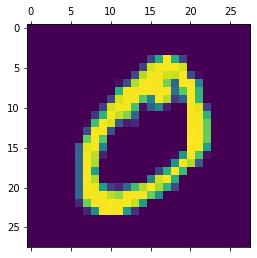

In [7]:
plt.matshow(X_train[1]) # uses the matshow module of the pyplot to visualize the digits

# here its plotting the 2nd element

In [8]:
y_train[1] #  the y or the output data is stored as actual digits and not in a matrix form

#this is output of 2nd element and it is 0

0

In [9]:
y_train[:50] # this is first 50 elements

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

**We should normalize the data between 0 and 1 in order to improve accuracy. Having scale difference between input values can lead to higher error rates.**

In [10]:
X_train = X_train / 255  #for normalization to get values between 0 and 1
X_test = X_test / 255

In [11]:
X_train[1] # element 2 after normalization

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**We now need to convert (or flatten) the 28X28 matrices into long arrays of** length 28*28 = 784  

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_train_flattened[0] # now it's one giant array instead of a matrix of 28X28

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Let's now build a ANN model using Keras's Sequential command. Please go on Keras website to know more about various modules, functions, and other features within this API. Go to this website for more information on compilation. https://data-flair.training/blogs/compile-evaluate-predict-model-in-keras/**

In [15]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'), #this is hidden layer with 100 nodes
    keras.layers.Dense(10, activation='sigmoid') # this is a output layer # there are 10 nodes
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)

#fitting the model

#this accuracy on the seen given data, not unseen data

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 1.4706 - accuracy: 0.6820
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7245 - accuracy: 0.8444
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5357 - accuracy: 0.8710
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4556 - accuracy: 0.8836
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4113 - accuracy: 0.8909
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3826 - accuracy: 0.8956
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3625 - accuracy: 0.8997
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3469 - accuracy: 0.9028
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.9054
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.324

In [16]:
model.evaluate(X_test_flattened, y_test) # calcualting the accuracy on the test dataset

#evaluate model on test set

313/313 [==============================] - 1s 2ms/step - loss: 0.2544 - accuracy: 0.9263


[0.25436192750930786, 0.9262999892234802]

In [17]:
y_predicted = model.predict(X_test_flattened) # creating a dataframe to store predictions for the flattened test dataset
y_predicted[0] # looking at the first prediction. The output is the predicted probabilities for each of the 10 digits. The category with highest probability should be our prdiction. 

array([0.59132457, 0.01181576, 0.84483224, 0.95877486, 0.02819679,
       0.5594585 , 0.00272777, 0.9999435 , 0.20192416, 0.9411622 ],
      dtype=float32)

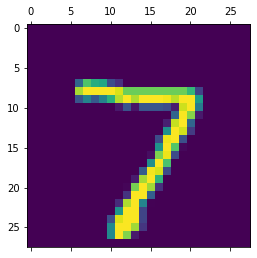

In [18]:
plt.matshow(X_test[0]) #for 1st item only we are checking here

In [19]:
np.argmax(y_predicted[0]) #using numpy's argmax function to extract the prediction with highest probability

7

In [20]:

y_predicted_labels = [np.argmax(i) for i in y_predicted] # this is quick function to extract the predictions with highest probability for all values in testing dataset

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    3,    1,    0,    3,    9,    1,    3,    0],
       [   0, 1108,    2,    2,    1,    2,    4,    2,   14,    0],
       [  13,    4,  927,   13,   12,    1,   14,   13,   28,    7],
       [   3,    1,   19,  926,    0,   24,    3,   14,   12,    8],
       [   1,    2,    4,    0,  917,    0,   13,    2,    4,   39],
       [  10,    2,    5,   39,    5,  781,   14,    4,   24,    8],
       [  12,    3,    4,    1,    9,   10,  914,    3,    2,    0],
       [   3,    9,   23,    6,    7,    0,    0,  948,    2,   30],
       [   9,    7,    6,   19,    9,   23,   12,   13,  865,   11],
       [  12,    7,    1,   11,   34,    5,    1,   15,    6,  917]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

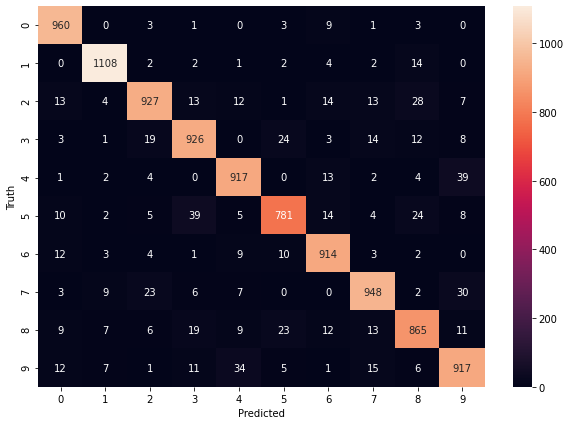

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adding one hidden layer now

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1241 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9839


In [24]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9778


[0.07215755432844162, 0.9778000116348267]

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.6866256e-04, 1.6448550e-03, 4.0977582e-01, 9.5821118e-01,
       2.8145334e-05, 8.9472096e-04, 2.0911973e-07, 9.9994838e-01,
       1.2879583e-01, 5.3683296e-03], dtype=float32)

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'Truth')

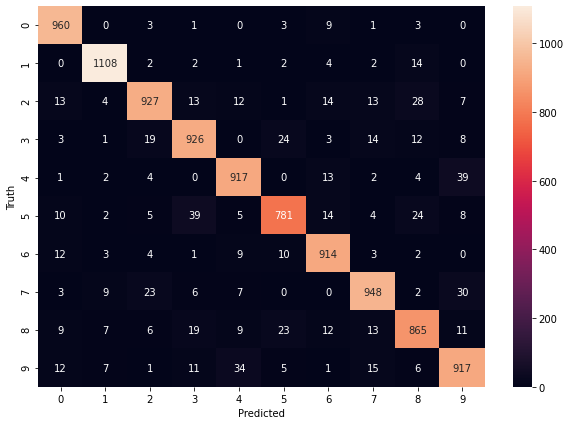

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')